In [14]:
! pip install num2words

  Using cached num2words-0.5.12-py3-none-any.whl (125 kB)
  Using cached docopt-0.6.2-py2.py3-none-any.whl

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [42]:
! pip install spacy

  Using cached spacy-3.5.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.8 MB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached numpy-1.24.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached srsly-2.4.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (493 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached thinc-8.1.9-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (925 kB)
  Using cached pydantic-1.10.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached preshed-3.0.8-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 

In [45]:
! python -m spacy download ro_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 28.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')


In [55]:
! pip install Unidecode

  Using cached Unidecode-1.3.6-py3-none-any.whl (235 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [68]:
! pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.10.31-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (772 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [93]:
import json
import re
from num2words import num2words
import string
import spacy
from unidecode import unidecode
from nltk.stem.snowball import SnowballStemmer
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
with open("positive_reviews.json", "r") as file:
    positive_reviews = json.loads(file.read())

with open("negative_reviews.json", "r") as file:
    negative_reviews = json.loads(file.read())

## 1. Curatati si normalizati corpus-ul aplicand urmatoarele operatiii:

### a) afisati caracterele diferite de literele mici ale alfabetului englez

In [12]:
for review in positive_reviews['reviews']:
    print(re.sub(r'[a-z\s\n]', '', review['content']))


-1.000()-....,(1).::--4-,20%(-);--1-2();-,5%,,;-,(-"",;-("",);-;-(),,.:-(),;-.(-).!:)

,-.
...
(20%-25%)12.30()(12.40):8..//_.12.403-4%()
!
..!
-!,,.
.
,.
,"".

.(60).
.
,,364,,.,4,6.0.1,,40%,.,,-,-,"".
,70+40.12!

.2......1.!
2
:-
..

,,,,,,-
/.,.::,::

!!!!
:-335%,,-,-,--,,-,10-(),(-)--2-:-,.
.
.."",:(..,.,..(2015),:)
--
,,3,
..

,,-,-,,4!!!
3132100/!
,3.
.........1../---31---------------------31-7//81/,..:.:....''''.
,.
.-,.(.-.-3-5...
+.
.,.,.
600,é.,
........

..
4,.
!
,.,...:180,.
,41148.
,
2017,200,..:1..-,,-.2.-,.,,.,,.3.,,.(-).:1.-.,,.:160,-200,300,.
2....
.
,--..,...-,:))).
.
.
5.,,.....!
,,.,./.
,-,..
-=
,,,.
!.
..-,.-.,-,--.3,,,.-,.,.-,(6,-).,,()().:-,-33.,:)
,.
::(5).:,,..,-1/3(520)./.:.,3.-(11-2)-,,-.::02,,.
,,,10.,.,../..-.-.
......
!
..
2()2()..3()..;98-
.
.2-3,1.
,-.-.....
6,,
-..,.!
.
.-.3,-,,....,,.100%23
,!4-5.!

..
!

!!
,.
!!!
,!
,./360°,!!!.4!!!
.
.:(700),,,,.:-,;,.,..-3.
,68.
4:1.()2.-
!
,-.
,,100%
"""".,.,,1-,,-.:-20.000:-,6(6)-,-,,:)).,-,.500.500.
..-220.


5,

### b) transformati numerele in cuvinte folosind num2words

In [33]:
reviews_num2words = []
for review in positive_reviews['reviews']:

    sentence = []
    for word in review['content'].split():
        if word.isdigit():
            word = num2words(float(word), lang='ro')
        sentence.append(word)
    reviews_num2words.append(' '.join(sentence))

    # reviews_num2words.append(' '.join([num2words(word, lang='ro') if word.isdigit() else word for word in review['content'].split()]))

print(reviews_num2words)



['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate). despre ceas: pro: - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi); - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine); - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare; - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok; - somnul il monitorizeaza destul de foarte exact (daca ma ridic sa beau

In [102]:
negative_num2words = []
for review in negative_reviews['reviews']:
    negative_num2words.append(' '.join([num2words(word, lang='ro') if word.isdigit() else word for word in review['content'].split()]))

### c) eliminati linkurile si alte referinte

In [39]:
reviews_no_links = [re.sub(r'http\S+|www\S+', '', review) for review in reviews_num2words]
print(reviews_no_links)

['am analizat la sange toate bratarile de fitness si smartwatch-urile de pe piata de pana la 1.000 lei (bugetul maxim alocat de mine pentru aceasta investitie) si pot sa spun ca acesta avea cele mai pozite review-uri mai peste tot.... alternativa era un apple watch, al carui baterie nu tinea mult din ce am inteles (in jur de unu zi jumatate). despre ceas: pro: - l-am pus la incarcat in a 4-a zi, cu mentiunea ca inca mai avea 20% baterie (m-ar mai fi tinut o zi); - pulsul este foarte precis - am testat comparativ cu un tensiometru si au aparut diferente de 1-2 batai pe minut (ceea ce este foarte bine); - pasii sunt cat de cat corecti, cu o eroare de pana la 5% maximum, insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu, aceasta fiind doar o estimare; - alergatul il inregistreaza cum trebuie, la fel si exercitiile (le-am introdus la categoria "workout", insa sunt sigura ca si la celelalte functioneaza ok; - somnul il monitorizeaza destul de foarte exact (daca ma ridic sa beau

In [103]:
negative_no_links = [re.sub(r'http\S+|www\S+', '', review) for review in negative_num2words]

### d) curatati-l de semnele de punctuatie

In [40]:
reviews_no_punctuation = [review.translate(str.maketrans('', '', string.punctuation)) for review in reviews_no_links]
print(reviews_no_punctuation)

['am analizat la sange toate bratarile de fitness si smartwatchurile de pe piata de pana la 1000 lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite reviewuri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de unu zi jumatate despre ceas pro  lam pus la incarcat in a 4a zi cu mentiunea ca inca mai avea 20 baterie mar mai fi tinut o zi  pulsul este foarte precis  am testat comparativ cu un tensiometru si au aparut diferente de 12 batai pe minut ceea ce este foarte bine  pasii sunt cat de cat corecti cu o eroare de pana la 5 maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare  alergatul il inregistreaza cum trebuie la fel si exercitiile leam introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok  somnul il monitorizeaza destul de foarte exact daca ma ridic sa beau apa sau pana la toaleta si inapoi apare awake

In [104]:
negative_no_punctuation = [review.translate(str.maketrans('', '', string.punctuation)) for review in negative_no_links]

### e) impartiti textele in cuvinte (tokens), va recomandam sa folositi spacy incarcand unul din modelele pentru limba romana (https://spacy.io/models/ro)

In [51]:
nlp = spacy.load("ro_core_news_sm")
doc = [nlp(review) for review in reviews_no_punctuation]
print(doc)


[am analizat la sange toate bratarile de fitness si smartwatchurile de pe piata de pana la 1000 lei bugetul maxim alocat de mine pentru aceasta investitie si pot sa spun ca acesta avea cele mai pozite reviewuri mai peste tot alternativa era un apple watch al carui baterie nu tinea mult din ce am inteles in jur de unu zi jumatate despre ceas pro  lam pus la incarcat in a 4a zi cu mentiunea ca inca mai avea 20 baterie mar mai fi tinut o zi  pulsul este foarte precis  am testat comparativ cu un tensiometru si au aparut diferente de 12 batai pe minut ceea ce este foarte bine  pasii sunt cat de cat corecti cu o eroare de pana la 5 maximum insa nu am stat sa verific fix pe fix sa vad daca e asa sau nu aceasta fiind doar o estimare  alergatul il inregistreaza cum trebuie la fel si exercitiile leam introdus la categoria workout insa sunt sigura ca si la celelalte functioneaza ok  somnul il monitorizeaza destul de foarte exact daca ma ridic sa beau apa sau pana la toaleta si inapoi apare awake 

In [105]:
negative_doc = [nlp(review) for review in negative_no_punctuation]

### f) eliminati stopwords

In [66]:
no_stopwords_doc = []
stop_words_spacy = nlp.Defaults.stop_words

for review in doc:
    for token in review:
        if token.text not in stop_words_spacy:
            no_stopwords_doc.append(token.text)

print(no_stopwords_doc)


['analizat', 'sange', 'bratarile', 'fitness', 'smartwatchurile', 'piata', 'pana', '1000', 'lei', 'bugetul', 'maxim', 'alocat', 'investitie', 'spun', 'pozite', 'reviewuri', 'alternativa', 'apple', 'watch', 'carui', 'baterie', 'tinea', 'inteles', 'jur', 'jumatate', 'ceas', 'pro', ' ', 'lam', 'pus', 'incarcat', '4a', 'mentiunea', '20', 'baterie', 'mar', 'tinut', ' ', 'pulsul', 'precis', ' ', 'testat', 'comparativ', 'tensiometru', 'aparut', 'diferente', '12', 'batai', 'minut', ' ', 'pasii', 'corecti', 'eroare', 'pana', '5', 'maximum', 'stat', 'verific', 'fix', 'fix', 'vad', 'fiind', 'estimare', ' ', 'alergatul', 'inregistreaza', 'trebuie', 'exercitiile', 'leam', 'introdus', 'categoria', 'workout', 'sigura', 'celelalte', 'functioneaza', 'ok', ' ', 'somnul', 'monitorizeaza', 'destul', 'ridic', 'beau', 'apa', 'pana', 'toaleta', 'apare', 'awake', 'urmand', 'inregistreze', 'somnul', 'continuare', 'pui', 'pat', 'dormi', ' ', 'rezistent', 'apa', ' ', 'prelua', 'respinge', 'apelurile', 'telefon', 

In [106]:
negative_no_stopwords_doc = []

for review in negative_doc:
    for token in review:
        if token.text not in stop_words_spacy:
            negative_no_stopwords_doc.append(token.text)

### g) aplicati stemming

In [71]:
stemmer = SnowballStemmer(language='romanian')
steamed_words = [stemmer.stem(word) for word in no_stopwords_doc]
print(steamed_words)

['analiz', 'sang', 'bratar', 'fitness', 'smartwatchur', 'piat', 'pan', '1000', 'lei', 'buget', 'max', 'aloc', 'investit', 'spun', 'pozit', 'reviewur', 'altern', 'apple', 'watch', 'caru', 'bater', 'tin', 'inteles', 'jur', 'jumat', 'ceas', 'pro', ' ', 'lam', 'pus', 'incarc', '4a', 'mentiun', '20', 'bater', 'mar', 'tinut', ' ', 'puls', 'precis', ' ', 'testat', 'compar', 'tensiometru', 'apar', 'diferent', '12', 'bata', 'minut', ' ', 'pas', 'corect', 'eroar', 'pan', '5', 'maximum', 'stat', 'verif', 'fix', 'fix', 'vad', 'fiind', 'estim', ' ', 'alerg', 'inregistreaz', 'trebui', 'exerc', 'leam', 'introdus', 'categor', 'workout', 'sigur', 'celelalt', 'functioneaz', 'ok', ' ', 'somn', 'monitorizeaz', 'dest', 'ridic', 'beau', 'apa', 'pan', 'toalet', 'apar', 'awak', 'urmand', 'inregistr', 'somn', 'continu', 'pui', 'pat', 'dorm', ' ', 'rezistent', 'apa', ' ', 'prelu', 'resping', 'apelur', 'telefon', 'funct', 'util', 'raspuns', 'trebui', 'iei', 'telefon', 'vorbest', 'efect', ' ', 'pot', 'raspund', '

### h) aplicati lematizare peste cuvintele obtinute la punctul f. Comparand cu rezultatele de la punctul g, afisati top 15 cuvinte pentru care stemul este diferit de lema, sortate descrescator dupa numarul de caractere prin care stemul difera de lema.

In [73]:
lemma_words = [word.lower() for word in no_stopwords_doc]

diferences = []
for i in range(len(steamed_words)):
    x = steamed_words[i]
    y = lemma_words[i]

    if x != y:
        diferences.append((no_stopwords_doc[i], abs(len(x) - len(y))))

diferences.sort(key=lambda x: x[1], reverse=True)
print("Top 15 cuvinte:\n", [x[0] for x in diferences[:15]])


Top 15 cuvinte:
 ['compatibilitatea', 'imposibilitatea', 'compatibilitatea', 'extensibilitatea', 'compatibilitatea', 'disponibilitatea', 'umidificatorului', 'disponibilitatea', 'compatibilitatea', 'functionabilitate', 'compatibilitate', 'compatibilitate', 'compatibilitate', 'accesibilitate', 'accesibilitate']


### i) cautati top 20 trigrame (collocations)

In [75]:
trigram_measures = TrigramAssocMeasures()
colloc_founder = TrigramCollocationFinder.from_words(no_stopwords_doc)

trigram_results = colloc_founder.nbest(trigram_measures.pmi, 20)
print(trigram_results)


[('07a', '506v', 'formula'), ('2591', 'mhz', 'telecomada'), ('326', '4ω10w', 'protejate'), ('a10', 'fusion', 'proceseaza'), ('acadeaza', 'intreeupe', 'stui'), ('acte', 'pregatite', 'chitanta'), ('admir', 'frumusetile', 'romaniei'), ('angry', 'birds', 'racing'), ('aparitia', 'agresiva', 'reclamelor'), ('armour', 'record', 'endomondo'), ('asamblarea', 'obiectului', 'sugereaza'), ('aspire', 'e5', '572g'), ('autoturismul', 'honda', 'civic'), ('avertizeaza', 'depasesti', 'bariera'), ('avizul', 'comisiei', 'europene'), ('basscu', 'dolby', 'atmos'), ('be', 'configured', 'settings'), ('bill', 'gates', 'trait'), ('birds', 'racing', 'temple'), ('calcule', 'metabolice', 'profesie')]


## 2. Calculati frecventele de aparitie ale fiecarui token la punctul e) si punctul g). Plotati-le cum doriti, prin wordcloud sau plotbar. Ce diferente observati? (intrucat numarul de cuvinte distincte poate fi mare, puteti plota informatii doar despre cele mai frecvente N cuvinte)

In [96]:

frequencies_word = dict()
frequencies_steamed = {}

for word in doc:
    if word.text in frequencies_word:
        frequencies_word[word.text] += 1
    else:
        frequencies_word[word.text] = 1

for word in steamed_words:
    if word in frequencies_steamed:
        frequencies_steamed[word] += 1
    else:
        frequencies_steamed[word] = 1

# top_words = list(frequencies_word.keys())
# top_words.sort(key=lambda x: 0 if x in [' ', ''] else frequencies_word[x], reverse=True)
# top_words = top_words[:30]
#
# top_steamed = list(frequencies_steamed.keys())
# top_steamed.sort(key=lambda x: 0 if x in [' ', ''] else frequencies_steamed[x], reverse=True)
# top_steamed = top_steamed[:30]



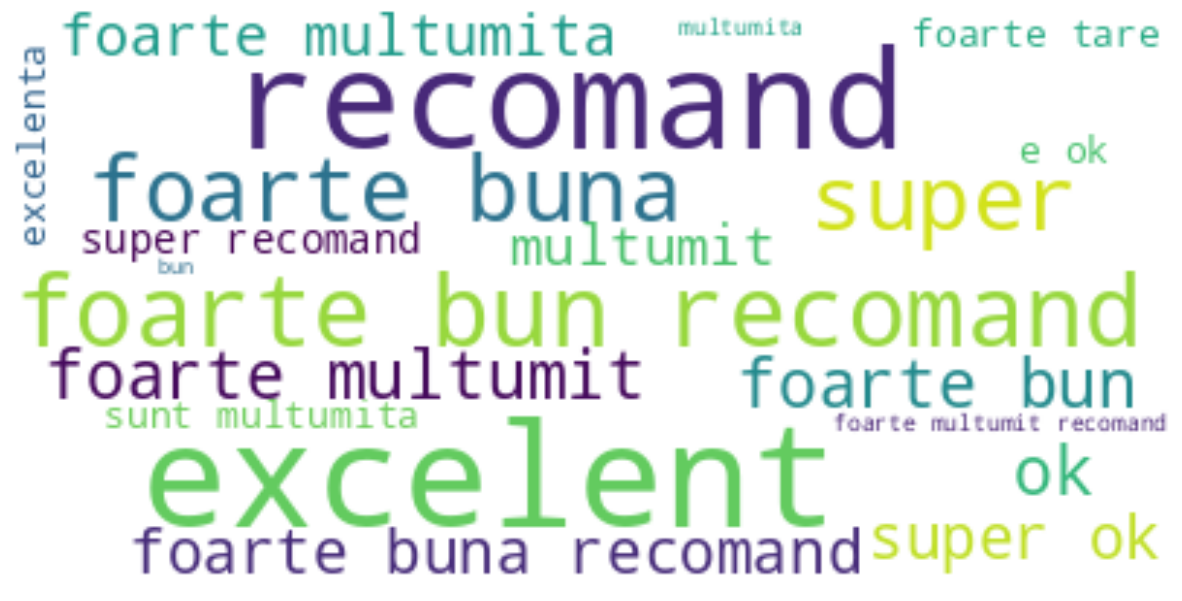

In [98]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(frequencies_word)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


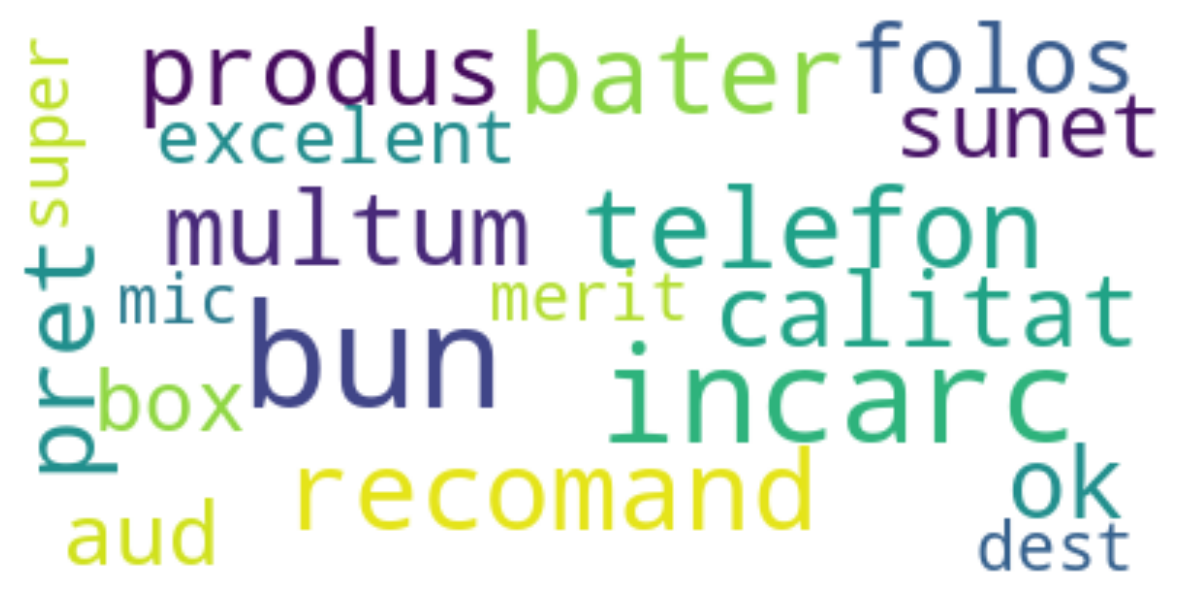

In [99]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white")
wordcloud_picture = wordcloud.generate_from_frequencies(frequencies_steamed)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cuvintele din wordcloudul steamed care se regasesc si in primul sunt cuvintele care nu aveau nevoie de steaming si lematizare.

## 3. Plotati distributia numarului de tokens per review (nr. de reviews vs. nr. de tokens), atat pentru review-urile negative, cat si, separat, pentru cele pozitive. Ce observati?

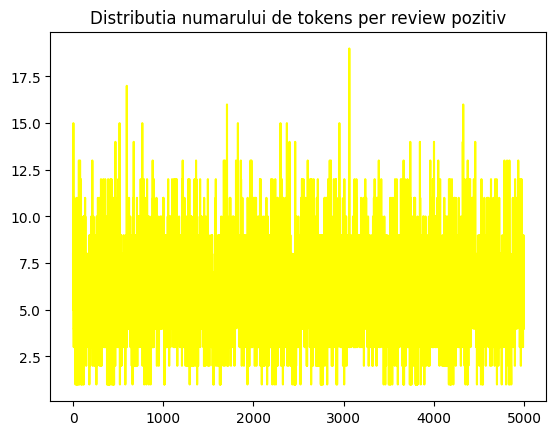

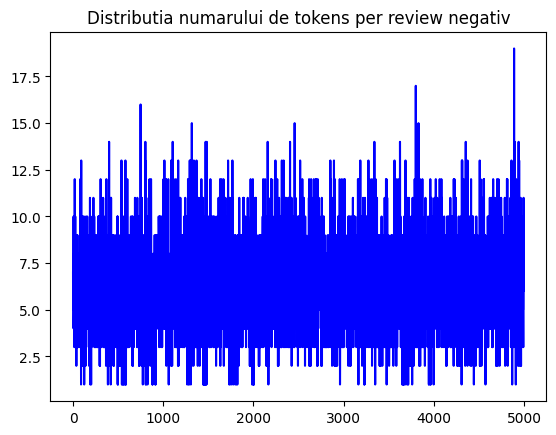

In [112]:
# plt.plot(range(len(no_stopwords_doc)), [len(x) for x in no_stopwords_doc], color='yellow')
plt.plot(range(5000), [len(x) for x in no_stopwords_doc[:5000]], color='yellow')
plt.title("Distributia numarului de tokens per review pozitiv")
plt.show()

# plt.plot(range(len(negative_no_stopwords_doc)), [len(x) for x in negative_no_stopwords_doc], color='blue')
plt.plot(range(5000), [len(x) for x in negative_no_stopwords_doc[:5000]], color='blue')
plt.title("Distributia numarului de tokens per review negativ")
plt.show()

Review-urile negative au in medie mai putine cuvinte decat cele pozitive.